## Important Libraries 

In [42]:
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from datetime import datetime
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind

## Data Collection

### Air Quality (PM2.5)

In [43]:
def process_state_folder(folder_path):

    all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(".csv")]
    df_list = []

    for file in all_files:
        df = pd.read_csv(file)
        required_cols = ["datetimeLocal", "value", "parameter"]
        if not all(col in df.columns for col in required_cols):
            print(f"Skipping {file}, missing columns")
            continue
        
        df = df[df["parameter"] == "pm25"]
        df_list.append(df)

    if not df_list:
        return pd.DataFrame()

    full_df = pd.concat(df_list, ignore_index=True)

    full_df["datetimeLocal"] = pd.to_datetime(full_df["datetimeLocal"], errors='coerce', utc=True)
    full_df = full_df.dropna(subset=["datetimeLocal"])

    full_df["date"] = full_df["datetimeLocal"].dt.date
    full_df["date"] = pd.to_datetime(full_df["date"])  

    daily_df = full_df.groupby("date")["value"].mean().reset_index()
    daily_df.rename(columns={"value": "pm25"}, inplace=True)

    city_name = os.path.basename(folder_path)
    daily_df["city"] = city_name

    all_dates = pd.date_range(start=daily_df["date"].min(), end=daily_df["date"].max())
    daily_df = daily_df.set_index("date").reindex(all_dates).rename_axis("date").reset_index()
    daily_df["city"] = city_name

    return daily_df


In [44]:
california_path = r"D:\college\Data Analysis\project\California"
cal_daily = process_state_folder(california_path)

print(cal_daily.head())


        date       pm25        city
0 2023-09-14  13.625000  California
1 2023-09-15  14.016667  California
2 2023-09-16  10.370833  California
3 2023-09-17   7.220833  California
4 2023-09-18   9.162500  California


In [45]:
crolinas_path = r"D:\college\Data Analysis\project\Carolinas"
carolinas_daily = process_state_folder(crolinas_path)
print(carolinas_daily.head())

        date       pm25       city
0 2023-09-14   5.478261  Carolinas
1 2023-09-15  10.679167  Carolinas
2 2023-09-16   6.629167  Carolinas
3 2023-09-17   7.845833  Carolinas
4 2023-09-18   9.187500  Carolinas


In [46]:
florida_path = r"D:\college\Data Analysis\project\Florida"
florida_daily = process_state_folder(florida_path)
print(florida_daily.head())

        date      pm25     city
0 2023-09-14  5.660870  Florida
1 2023-09-15  4.779167  Florida
2 2023-09-16  5.554167  Florida
3 2023-09-17  4.837500  Florida
4 2023-09-18  6.016667  Florida


In [47]:
new_york_path = r"D:\college\Data Analysis\project\New York"
new_york_daily = process_state_folder(new_york_path)
print(new_york_daily.head())

        date      pm25      city
0 2023-09-15  2.308696  New York
1 2023-09-16  3.454167  New York
2 2023-09-17  5.983333  New York
3 2023-09-18  3.829167  New York
4 2023-09-19  4.041667  New York


In [48]:
tennessee_path = r"D:\college\Data Analysis\project\Tennessee"
tennessee_daily = process_state_folder(tennessee_path)
print(tennessee_daily.head())

        date       pm25       city
0 2023-09-19   7.242857  Tennessee
1 2023-09-20  11.295833  Tennessee
2 2023-09-21  15.016667  Tennessee
3 2023-09-22  12.629167  Tennessee
4 2023-09-23  13.295833  Tennessee


In [49]:
texas_path = r"D:\college\Data Analysis\project\Texas"
texas_daily = process_state_folder(texas_path)
print(texas_daily.head())

        date       pm25   city
0 2023-09-15  12.021739  Texas
1 2023-09-16   8.233333  Texas
2 2023-09-17  10.279167  Texas
3 2023-09-18  15.675000  Texas
4 2023-09-19  13.295833  Texas


In [50]:
all_states_daily = pd.concat([
    cal_daily,
    carolinas_daily,
    florida_daily,
    new_york_daily,
    tennessee_daily,
    texas_daily
], ignore_index=True)

print(all_states_daily.head())
all_states_daily.to_csv(r"D:\college\Data Analysis\project\all_states_daily_pm25.csv", index=False)

        date       pm25        city
0 2023-09-14  13.625000  California
1 2023-09-15  14.016667  California
2 2023-09-16  10.370833  California
3 2023-09-17   7.220833  California
4 2023-09-18   9.162500  California


### Weather (Temperature)

In [51]:

from meteostat import Point, Daily
cities = {
    'Florida': Point(25.7617, -80.1918),
    'California': Point(34.0522, -118.2437),
    'Texas': Point(29.7604, -95.3698),
    'New York': Point(40.7128, -74.0060),
    'Tennessee': Point(36.1627, -86.7816),
    'Carolinas': Point(35.7796, -78.6382)  
}

start = datetime(2023, 9, 14)
end = datetime(2025, 12, 25)

all_data = []

for city_name, point in cities.items():
    data = Daily(point, start, end)
    df = data.fetch()
    if df.empty:
        print(f"No data for {city_name}")
        continue
    df = df.reset_index()
    df = df[['time', 'tmax', 'tmin', 'tavg']]
    df.rename(columns={'time':'date', 'tavg':'temp_mean', 'tmax':'temp_max', 'tmin':'temp_min'}, inplace=True)
    df['city'] = city_name
    all_data.append(df)

temp_df = pd.concat(all_data, ignore_index=True)
temp_df.to_csv("city_daily_temperatures_clean.csv", index=False)

print(temp_df.head())


        date  temp_max  temp_min  temp_mean     city
0 2023-09-14      33.9      26.1       30.0  Florida
1 2023-09-15      32.8      25.6       28.0  Florida
2 2023-09-16      32.8      24.4       28.1  Florida
3 2023-09-17      33.3      25.0       27.9  Florida
4 2023-09-18      34.4      25.0       28.7  Florida


### Electricity Consumption

In [52]:
electricity_path = r"D:\college\Data Analysis\project\electricity_generation daily.csv"
elec_df = pd.read_csv(electricity_path)

elec_df['date'] = pd.to_datetime(elec_df['period'], format='%Y-%m-%d', errors='coerce')

elec_df = elec_df[['date', 'respondent', 'value']]
elec_df.rename(columns={'respondent':'city', 'value':'electricity_mwh'}, inplace=True)

city_map = {
    'CAL':'California',
    'CAR':'Carolinas',
    'FLA':'Florida',
    'NY':'New York',
    'TEN':'Tennessee',
    'TEX':'Texas'
}
elec_df['city'] = elec_df['city'].map(city_map)


In [53]:
merged_df = pd.merge(all_states_daily, temp_df, on=['date','city'], how='left')

merged_df = pd.merge(merged_df, elec_df, on=['date','city'], how='left')

merged_df = merged_df[['city', 'date', 'pm25', 'temp_max', 'temp_min', 'temp_mean', 'electricity_mwh']]

print(merged_df.head())

merged_df.to_csv(r"D:\college\Data Analysis\project\final_merged_data.csv", index=False)


         city       date       pm25  temp_max  temp_min  temp_mean  \
0  California 2023-09-14  13.625000      25.0      19.0       21.4   
1  California 2023-09-15  14.016667      24.0      19.0       21.2   
2  California 2023-09-16  10.370833      22.0      19.0       20.5   
3  California 2023-09-17   7.220833      23.0      19.0       20.9   
4  California 2023-09-18   9.162500      25.0      18.0       20.9   

   electricity_mwh  
0         816728.0  
1         809940.0  
2         750465.0  
3         702396.0  
4         759950.0  


## Preprocessing & Feature Engineering

Added `day_name` and `day_of_week` columns to identify the day of the week.

Created `is_weekend` column to flag weekends.

These features are useful for analyzing the effect of weekends on air quality

In [54]:
df = pd.read_csv(r"D:\college\Data Analysis\project\final_merged_interpolated_data.csv")
df['date'] = pd.to_datetime(df['date'])
df['day_name'] = df['date'].dt.day_name()
df['day_of_week'] = df['date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'] >= 5
df.to_csv(r"D:\college\Data Analysis\project\final_merged_interpolated_data_with_days.csv", index=False)
df.head()


,state,date,pm25,temp_max,temp_min,temp_mean,electricity_mwh,year,month,green_percentage,day_name,day_of_week,is_weekend
0,California,2023-09-14,13.625000,26.5,11.1,18.9,816728.0,2023,9,47.052985,Thursday,3,False
1,California,2023-09-15,14.016667,28.1,12.4,19.8,809940.0,2023,9,47.052985,Friday,4,False
2,California,2023-09-16,10.370833,26.7,16.0,20.2,750465.0,2023,9,47.052985,Saturday,5,True
3,California,2023-09-17,7.220833,24.4,13.9,18.0,702396.0,2023,9,47.052985,Sunday,6,True
4,California,2023-09-18,9.162500,26.6,10.4,18.3,759950.0,2023,9,47.052985,Monday,0,False


In [55]:
temp_df = pd.read_csv(r"D:\college\Data Analysis\project\all_cities_daily_weather.csv")

In [56]:
df_old = pd.read_csv(r"D:\college\Data Analysis\project\final_merged_interpolated_data_with_days.csv")
df_old['date'] = pd.to_datetime(df_old['date'])
# temp_df = pd.read_csv("city_daily_temperatures_clean.csv")
temp_df['date'] = pd.to_datetime(temp_df['date'])
temp_df.rename(columns={'city':'state'}, inplace=True) 

df = pd.merge(
    df_old.drop(columns=['temp_max','temp_min','temp_mean']), 
    temp_df[['state','date','temp_max','temp_min','temp_mean']], 
    on=['state','date'],
    how='left'
)

print(df.head())
print(df.columns)

df.to_csv(r"D:\college\Data Analysis\project\final_merged_data_updated.csv", index=False)


        state       date       pm25  electricity_mwh  year  month  \
0  California 2023-09-14  13.625000         816728.0  2023      9   
1  California 2023-09-15  14.016667         809940.0  2023      9   
2  California 2023-09-16  10.370833         750465.0  2023      9   
3  California 2023-09-17   7.220833         702396.0  2023      9   
4  California 2023-09-18   9.162500         759950.0  2023      9   

   green_percentage  day_name  day_of_week  is_weekend  temp_max  temp_min  \
0         47.052985  Thursday            3       False      27.0      17.4   
1         47.052985    Friday            4       False      26.8      16.5   
2         47.052985  Saturday            5        True      25.8      17.9   
3         47.052985    Sunday            6        True      25.3      18.7   
4         47.052985    Monday            0       False      25.8      16.8   

   temp_mean  
0       21.2  
1       20.2  
2       20.6  
3       20.4  
4       20.5  
Index(['state', 'date', 'p

In [57]:
df['is_weekend'] = df['is_weekend'].apply(lambda x: 1 if x else 0)
df.head()

,state,date,pm25,electricity_mwh,year,month,green_percentage,day_name,day_of_week,is_weekend,temp_max,temp_min,temp_mean
0,California,2023-09-14,13.625000,816728.0,2023,9,47.052985,Thursday,3,0,27.0,17.4,21.2
1,California,2023-09-15,14.016667,809940.0,2023,9,47.052985,Friday,4,0,26.8,16.5,20.2
2,California,2023-09-16,10.370833,750465.0,2023,9,47.052985,Saturday,5,1,25.8,17.9,20.6
3,California,2023-09-17,7.220833,702396.0,2023,9,47.052985,Sunday,6,1,25.3,18.7,20.4
4,California,2023-09-18,9.162500,759950.0,2023,9,47.052985,Monday,0,0,25.8,16.8,20.5


In [58]:
green = pd.read_csv("green_space_monthly_data.csv")

In [59]:
green["state_clean"] = green["state"].replace({
    "North Carolina": "Carolinas",
    "South Carolina": "Carolinas"
})

In [60]:
green_monthly = (
    green
    .groupby(["state_clean", "year", "month"])["green_percentage"]
    .mean()
    .reset_index()
)


In [61]:
df = df.drop(columns=["green_percentage"])

df = df.merge(
    green_monthly,
    left_on=["state", "year", "month"],
    right_on=["state_clean", "year", "month"],
    how="left"
)

df.drop(columns=["state_clean"], inplace=True)


In [62]:
df[df["state"]=="Carolinas"].groupby(["year","month"])["green_percentage"].mean()


year  month
2023  9        77.799482
      10       88.941513
      11       86.957738
      12       85.883389
2024  1        84.124540
      2        85.600374
      3        76.736588
      4        86.702469
      5        81.837435
      6        85.472865
      7        85.909687
      8        88.557385
      9        87.442028
      10       89.269297
      11       87.730722
      12       84.273647
2025  1        84.620327
      2        83.914270
      3        85.995573
      4        71.912893
      5        79.805192
      6        87.418996
      7        89.308243
      8        76.682919
      9        88.748043
      10       89.003871
      11       87.467492
      12       84.593444
Name: green_percentage, dtype: float64

In [63]:
meta = ["state", "date", "year", "month", "day_name", "day_of_week", "is_weekend"]
air = ["pm25"]
weather = ["temp_max", "temp_min", "temp_mean"]
energy = ["electricity_mwh"]
green = ["green_percentage"]

df = df[meta + air + weather + energy + green]


In [64]:
df.shape

(4997, 13)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   state             4997 non-null   object        
 1   date              4997 non-null   datetime64[ns]
 2   year              4997 non-null   int64         
 3   month             4997 non-null   int64         
 4   day_name          4997 non-null   object        
 5   day_of_week       4997 non-null   int64         
 6   is_weekend        4997 non-null   int64         
 7   pm25              4997 non-null   float64       
 8   temp_max          4997 non-null   float64       
 9   temp_min          4997 non-null   float64       
 10  temp_mean         4997 non-null   float64       
 11  electricity_mwh   4997 non-null   float64       
 12  green_percentage  4997 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(4), object(2)
memory usage: 507.6+ KB


In [66]:
df.isnull().sum()  

state               0
date                0
year                0
month               0
day_name            0
day_of_week         0
is_weekend          0
pm25                0
temp_max            0
temp_min            0
temp_mean           0
electricity_mwh     0
green_percentage    0
dtype: int64

In [67]:
# df = df.sort_values(['state', 'date']).reset_index(drop=True)

# df['temp_max'] = df.groupby('state')['temp_max'].transform(lambda x: x.interpolate())
# df['temp_min'] = df.groupby('state')['temp_min'].transform(lambda x: x.interpolate())
# df['temp_mean'] = df.groupby('state')['temp_mean'].transform(lambda x: x.interpolate())

# print(df[['temp_max','temp_min','temp_mean']].isnull().sum())


In [68]:
df.duplicated().sum()

np.int64(0)

In [69]:
df.describe()

,date,year,month,day_of_week,is_weekend,pm25,temp_max,temp_min,temp_mean,electricity_mwh,green_percentage
count,4997,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4.997000e+03,4997.000000
mean,2024-11-04 01:57:17.182309376,2024.301581,7.022413,2.999400,0.285371,9.176869,23.378327,13.993456,18.110847,7.031546e+05,67.464480
min,2023-09-14 00:00:00,2023.000000,1.000000,0.000000,0.000000,-4.000000,-8.100000,-18.800000,-13.300000,2.714600e+05,6.735499
25%,2024-04-10 00:00:00,2024.000000,4.000000,1.000000,0.000000,5.039130,18.500000,8.200000,12.900000,4.688820e+05,52.335639
50%,2024-11-04 00:00:00,2024.000000,7.000000,3.000000,0.000000,7.650000,25.400000,15.200000,19.800000,6.258330e+05,71.011809
75%,2025-05-31 00:00:00,2025.000000,10.000000,5.000000,1.000000,11.150000,29.500000,21.200000,24.700000,8.252850e+05,84.959679
max,2025-12-25 00:00:00,2025.000000,12.000000,6.000000,1.000000,168.205556,45.700000,29.000000,34.300000,1.739798e+06,96.402768
std,NaN,0.685331,3.519461,1.999249,0.451636,8.496225,8.241130,8.506233,8.218961,3.098507e+05,19.924573


**Handling Negative PM2.5 Values**

Replaced negative PM2.5 values with the `minimum positive` value for each state.

This prevents unrealistic values from affecting analysis and visualization.

In [70]:
neg_pm25 = df[df["pm25"] < 0]
neg_pm25.head()

,state,date,year,month,day_name,day_of_week,is_weekend,pm25,temp_max,temp_min,temp_mean,electricity_mwh,green_percentage
170,California,2024-03-02,2024,3,Saturday,5,1,-0.004167,15.4,12.5,13.8,643378.0,50.428703
512,California,2025-02-07,2025,2,Friday,4,0,-0.020833,17.2,13.4,14.8,708362.0,44.445044
926,Carolinas,2023-12-15,2023,12,Friday,4,0,-1.726087,12.9,-1.2,4.3,699652.0,85.883389
927,Carolinas,2023-12-16,2023,12,Saturday,5,1,-2.400000,13.6,0.2,5.7,633290.0,85.883389
928,Carolinas,2023-12-17,2023,12,Sunday,6,1,-1.439130,12.9,7.0,9.2,572638.0,85.883389


In [71]:
neg_pm25.shape

(66, 13)

In [72]:
neg_by_state = (neg_pm25.groupby("state").size().reset_index(name="negative_count").sort_values("negative_count", ascending=False)
)

neg_by_state


,state,negative_count
1,Carolinas,38
2,New York,26
0,California,2


In [73]:
min_positive_pm25 = (df[df["pm25"] > 0].groupby("state")["pm25"].min())
min_positive_pm25

state
California    1.195833
Carolinas     0.008333
Florida       1.504167
New York      0.020833
Tennessee     0.954167
Texas         1.386957
Name: pm25, dtype: float64

In [74]:
def replace_negative_pm25(row):
    if row["pm25"] < 0:
        return min_positive_pm25.loc[row["state"]]
    return row["pm25"]

df["pm25"] = df.apply(replace_negative_pm25, axis=1)


In [75]:
df.describe()

,date,year,month,day_of_week,is_weekend,pm25,temp_max,temp_min,temp_mean,electricity_mwh,green_percentage
count,4997,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4.997000e+03,4997.000000
mean,2024-11-04 01:57:17.182309376,2024.301581,7.022413,2.999400,0.285371,9.196451,23.378327,13.993456,18.110847,7.031546e+05,67.464480
min,2023-09-14 00:00:00,2023.000000,1.000000,0.000000,0.000000,0.008333,-8.100000,-18.800000,-13.300000,2.714600e+05,6.735499
25%,2024-04-10 00:00:00,2024.000000,4.000000,1.000000,0.000000,5.039130,18.500000,8.200000,12.900000,4.688820e+05,52.335639
50%,2024-11-04 00:00:00,2024.000000,7.000000,3.000000,0.000000,7.650000,25.400000,15.200000,19.800000,6.258330e+05,71.011809
75%,2025-05-31 00:00:00,2025.000000,10.000000,5.000000,1.000000,11.150000,29.500000,21.200000,24.700000,8.252850e+05,84.959679
max,2025-12-25 00:00:00,2025.000000,12.000000,6.000000,1.000000,168.205556,45.700000,29.000000,34.300000,1.739798e+06,96.402768
std,NaN,0.685331,3.519461,1.999249,0.451636,8.472451,8.241130,8.506233,8.218961,3.098507e+05,19.924573


 **PM2.5 Visualization & Outliers**

Boxplot shows the distribution of PM2.5 values.

Identified outliers using IQR method.

Outliers can indicate extreme pollution events and should be examined separately.

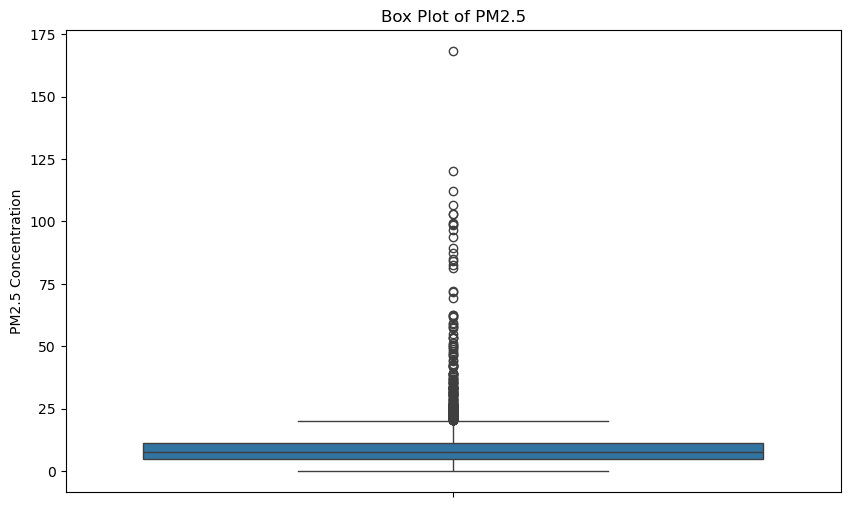

In [76]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df['pm25'])
plt.title('Box Plot of PM2.5')
plt.ylabel('PM2.5 Concentration')
plt.show()


In [77]:
Q1 = df['pm25'].quantile(0.25)
Q3 = df['pm25'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['pm25'] < Q1 - 1.5*IQR) | (df['pm25'] > Q3 + 1.5*IQR)]

print("outliers:", outliers.shape[0])


outliers: 225


In [105]:
out = outliers.sort_values("pm25",ascending=False)  
out.to_csv(r"D:\college\Data Analysis\project\pm25_outliers.csv", index=False)

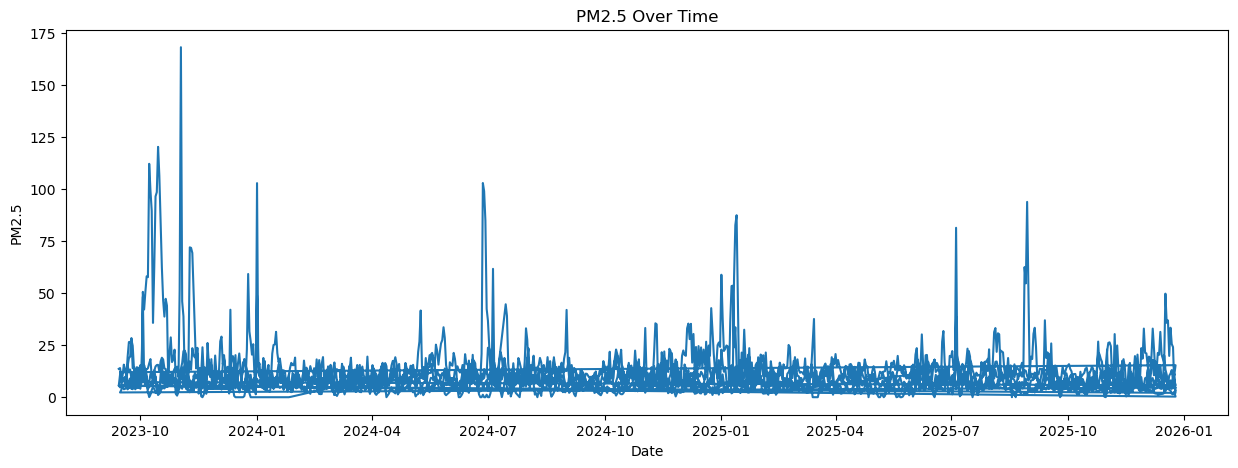

In [107]:
plt.figure(figsize=(15,5))
plt.plot(df['date'], df['pm25'])
plt.title('PM2.5 Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.show()


<Axes: xlabel='pm25', ylabel='Count'>

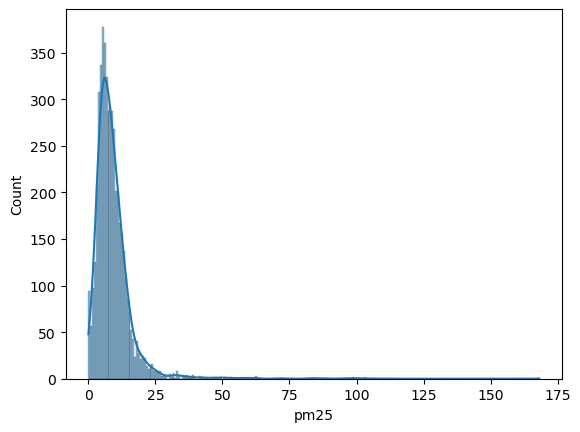

In [81]:
sns.histplot(df['pm25'], kde=True)

In [82]:
df['electricity_scaled'] = df['electricity_mwh'] / 10000
df.head()

,state,date,year,month,day_name,day_of_week,is_weekend,pm25,temp_max,temp_min,temp_mean,electricity_mwh,green_percentage,electricity_scaled
0,California,2023-09-14,2023,9,Thursday,3,0,13.625000,27.0,17.4,21.2,816728.0,47.052985,81.6728
1,California,2023-09-15,2023,9,Friday,4,0,14.016667,26.8,16.5,20.2,809940.0,47.052985,80.9940
2,California,2023-09-16,2023,9,Saturday,5,1,10.370833,25.8,17.9,20.6,750465.0,47.052985,75.0465
3,California,2023-09-17,2023,9,Sunday,6,1,7.220833,25.3,18.7,20.4,702396.0,47.052985,70.2396
4,California,2023-09-18,2023,9,Monday,0,0,9.162500,25.8,16.8,20.5,759950.0,47.052985,75.9950


In [83]:
df['pm25_norm'] = (df['pm25'] - df['pm25'].min()) / (df['pm25'].max() - df['pm25'].min())
df['green_norm'] = (df['green_percentage'] - df['green_percentage'].min()) / (df['green_percentage'].max() - df['green_percentage'].min())
df['temp_norm'] = (df['temp_mean'] - df['temp_mean'].min()) / (df['temp_mean'].max() - df['temp_mean'].min())
df['electricity_norm'] = (df['electricity_mwh'] - df['electricity_mwh'].min()) / (df['electricity_mwh'].max() - df['electricity_mwh'].min())


df['QoL'] = (
    0.4 * (1 - df['pm25_norm']) +
    0.3 * df['green_norm'] +
    0.2 * df['temp_norm'] +
    0.1 * (1 - df['electricity_norm']) 
)

df['QoL'] = (df['QoL'] - df['QoL'].min()) / (df['QoL'].max() - df['QoL'].min())

df[['date','state','QoL']].head()


,date,state,QoL
0,2023-09-14,California,0.616051
1,2023-09-15,California,0.608284
2,2023-09-16,California,0.632232
3,2023-09-17,California,0.648735
4,2023-09-18,California,0.635238


## Exploratory Data Analysis (EDA)

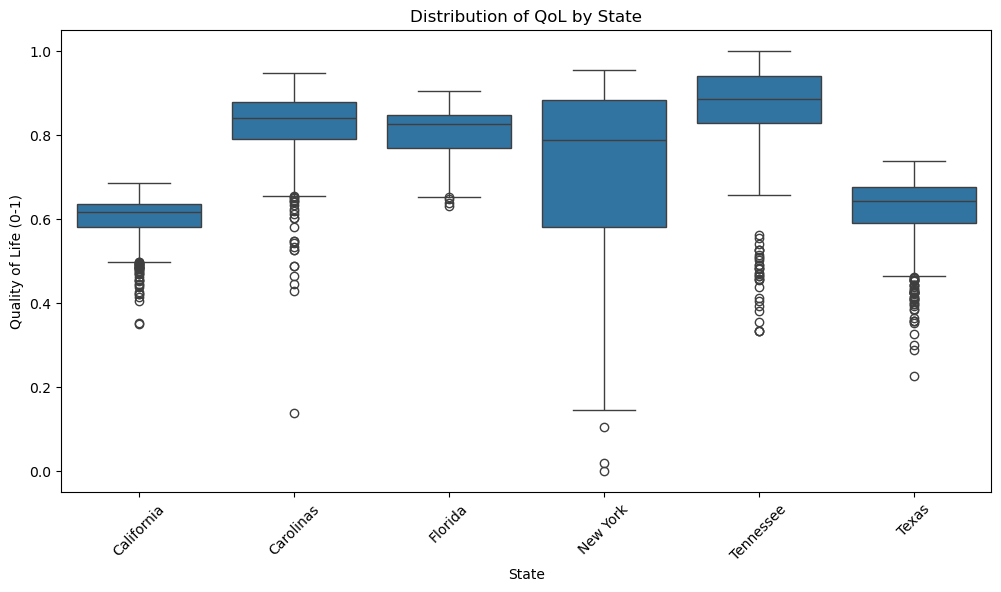

In [84]:
plt.figure(figsize=(12,6))
sns.boxplot(x='state', y='QoL', data=df)
plt.title('Distribution of QoL by State')
plt.ylabel('Quality of Life (0-1)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()

**Explanation:**

The boxplot above shows the distribution of the Quality of Life (QoL) index for each state. We can see that states like Tennessee and Florida have higher median QoL values, while California and Texas have lower medians. The spread (interquartile range) and presence of outliers indicate variability in QoL within each state. This suggests that environmental and climatic factors, as well as green space and energy consumption, have a significant impact on the overall quality of life in different regions.

### Green space Vs Air quality 'PM2.5'

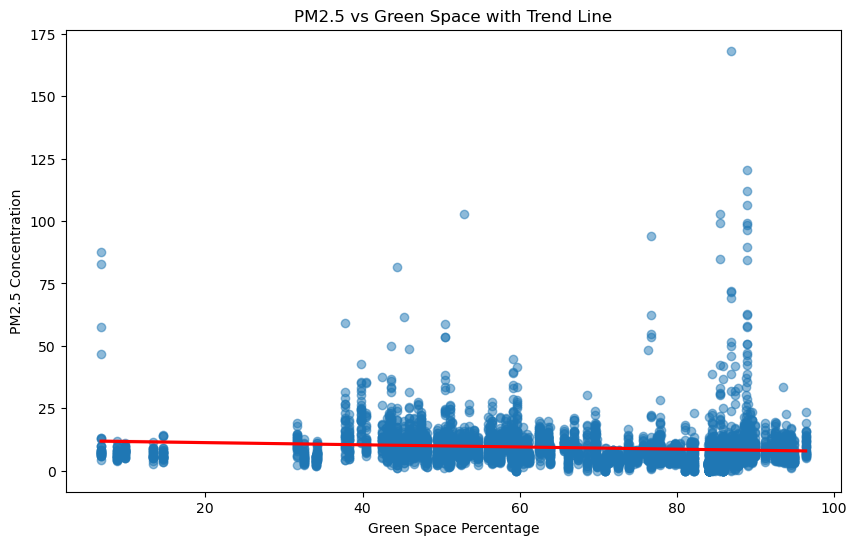

In [85]:
plt.figure(figsize=(10,6))
sns.regplot(
    data=df,
    x='green_percentage',
    y='pm25',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)
plt.title('PM2.5 vs Green Space with Trend Line')
plt.xlabel('Green Space Percentage')
plt.ylabel('PM2.5 Concentration')
plt.show()


**Explanation:**

This scatter plot shows the relationship between green space percentage and PM2.5 concentration. The red trend line indicates a slight negative correlation, meaning that as green space increases, PM2.5 levels tend to decrease. However, the spread of points and presence of outliers suggest that other factors may also influence air quality. 

In general, increasing green space can help reduce air pollution, but the effect may vary depending on local conditions and other environmental variables.

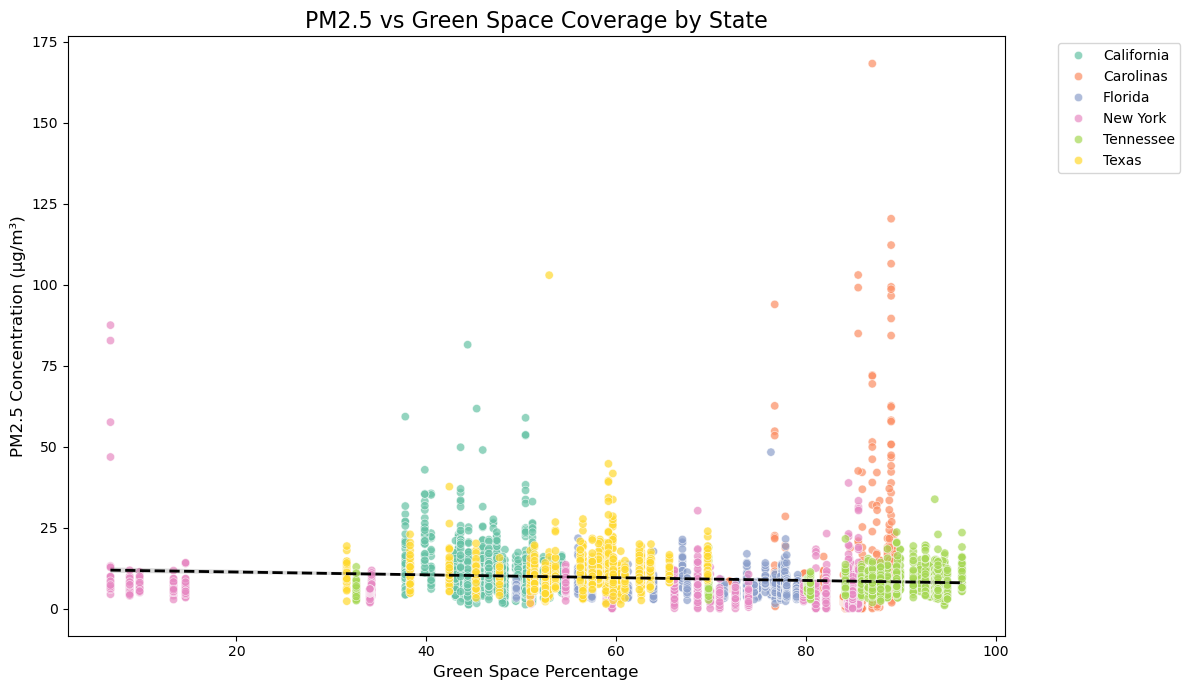

In [106]:
plt.figure(figsize=(12,7))
sns.scatterplot(
    data=df,
    x='green_percentage',
    y='pm25',
    hue='state',    
    alpha=0.7,
    palette='Set2',
    sizes=(30,200)
)
sns.regplot(
    data=df,
    x='green_percentage',
    y='pm25',
    scatter=False,
    color='black',
    line_kws={'linewidth':2, 'linestyle':'--'}
)
plt.title('PM2.5 vs Green Space Coverage by State', fontsize=16)
plt.xlabel('Green Space Percentage', fontsize=12)
plt.ylabel('PM2.5 Concentration (µg/m³)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### PM2.5

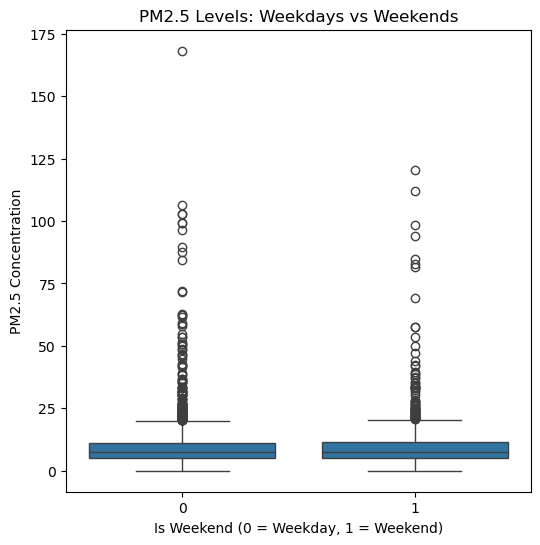

In [87]:
plt.figure(figsize=(6,6))
sns.boxplot(
    data=df,
    x='is_weekend',
    y='pm25'
)
plt.title('PM2.5 Levels: Weekdays vs Weekends')
plt.xlabel('Is Weekend (0 = Weekday, 1 = Weekend)')
plt.ylabel('PM2.5 Concentration')
plt.show()


**Explanation:**

The boxplot compares PM2.5 between weekdays (0) and weekends (1). Medians are similar, showing no major difference. Outliers reflect real events like wildfires or dust storms, causing temporary spikes in air pollution.

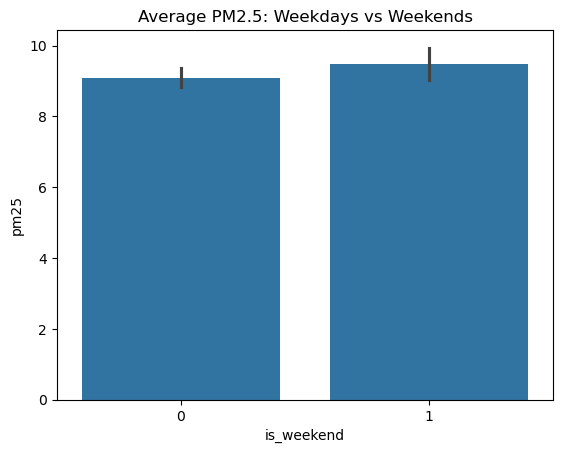

In [88]:
sns.barplot(data=df, x='is_weekend', y='pm25')
plt.title("Average PM2.5: Weekdays vs Weekends")
plt.show()


In [89]:
df.groupby('is_weekend')['pm25'].mean()


is_weekend
0    9.087135
1    9.470202
Name: pm25, dtype: float64

In [90]:
df.groupby('state')['pm25'].mean().sort_values()


state
New York       6.029919
Florida        6.887115
Tennessee      8.081319
Carolinas     10.142512
Texas         11.712048
California    12.318330
Name: pm25, dtype: float64

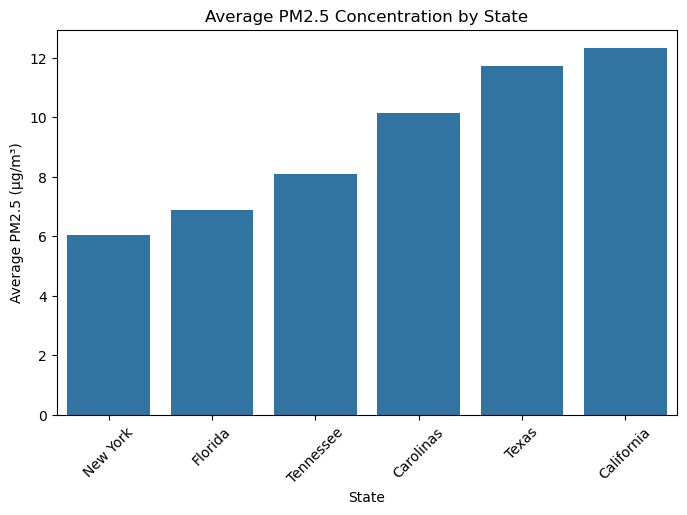

In [91]:
state_pm25 = (
    df.groupby('state')['pm25']
      .mean()
      .sort_values()
      .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=state_pm25,
    x='state',
    y='pm25'
)

plt.title('Average PM2.5 Concentration by State')
plt.xlabel('State')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.show()


### Electricity Vs Temperature 

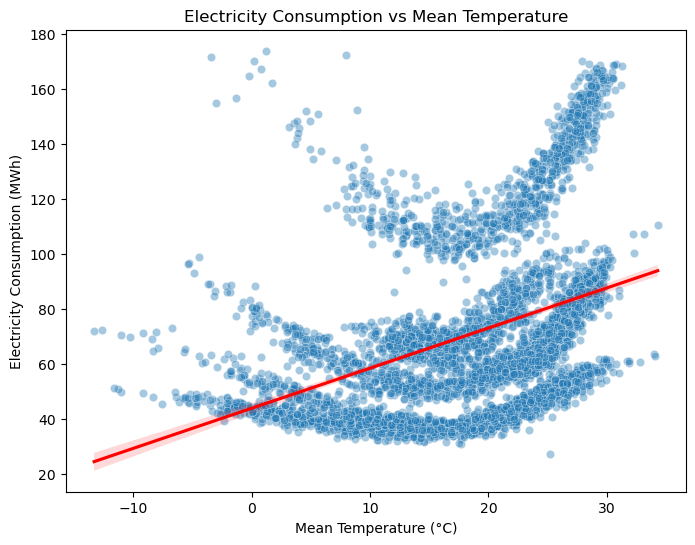

In [92]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='temp_mean',
    y='electricity_scaled',
    alpha=0.4
)
sns.regplot(
    data=df,
    x='temp_mean',
    y='electricity_scaled',
    scatter=False,
    color='red'
)
plt.title('Electricity Consumption vs Mean Temperature')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Electricity Consumption (MWh)')
plt.show()


<Figure size 1200x800 with 0 Axes>

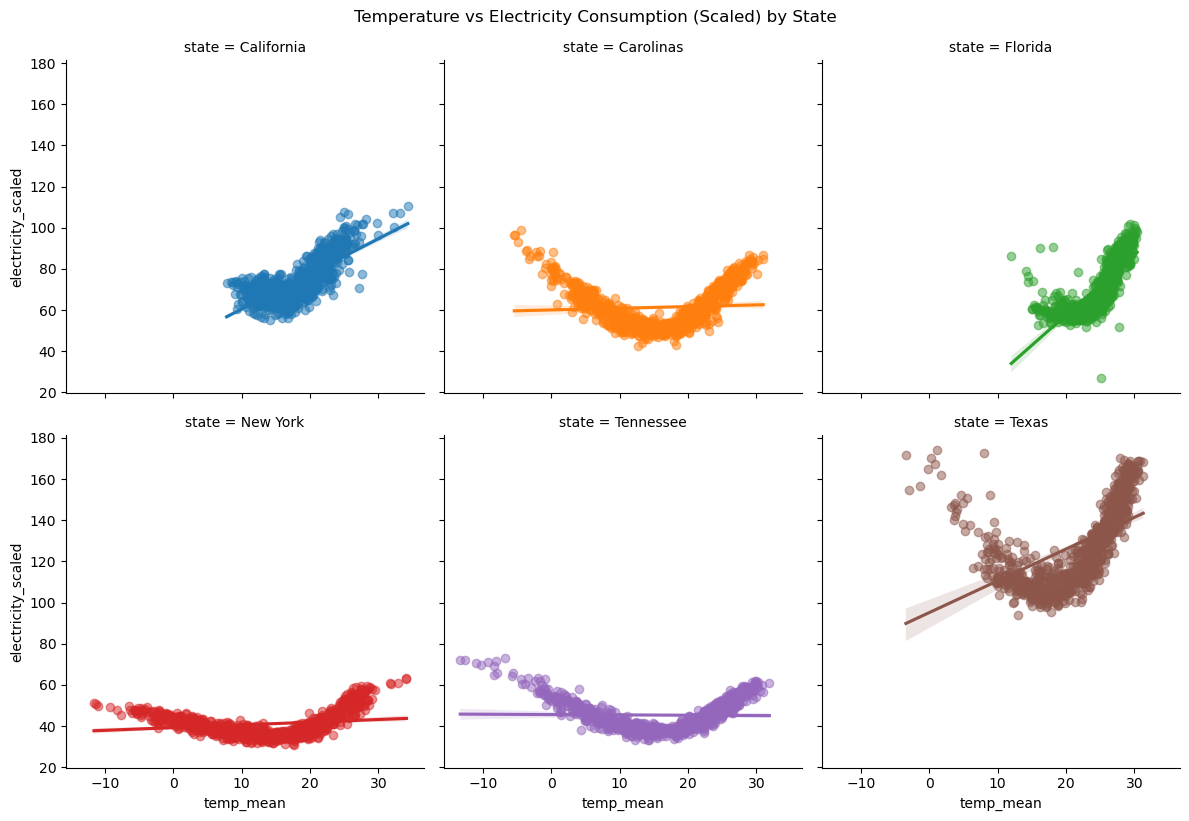

In [93]:
plt.figure(figsize=(12,8))
sns.lmplot(
    data=df,
    x='temp_mean',
    y='electricity_scaled',
    col='state',
    hue='state',
    col_wrap=3,
    height=4,
    scatter_kws={'alpha':0.5})
plt.suptitle('Temperature vs Electricity Consumption (Scaled) by State', y=1.02)
plt.show()


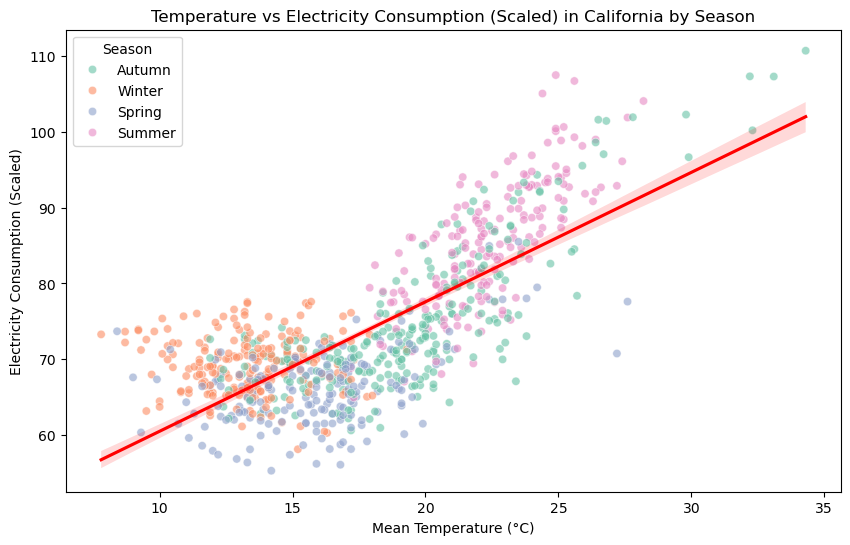

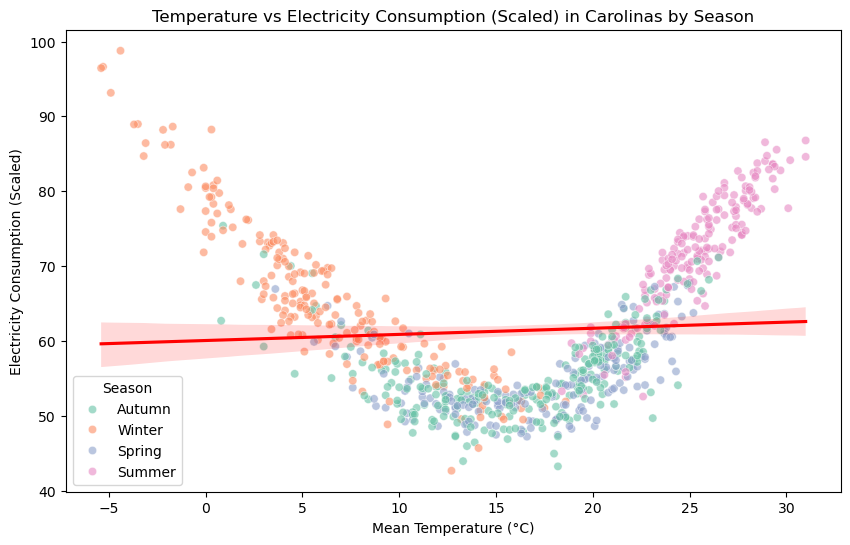

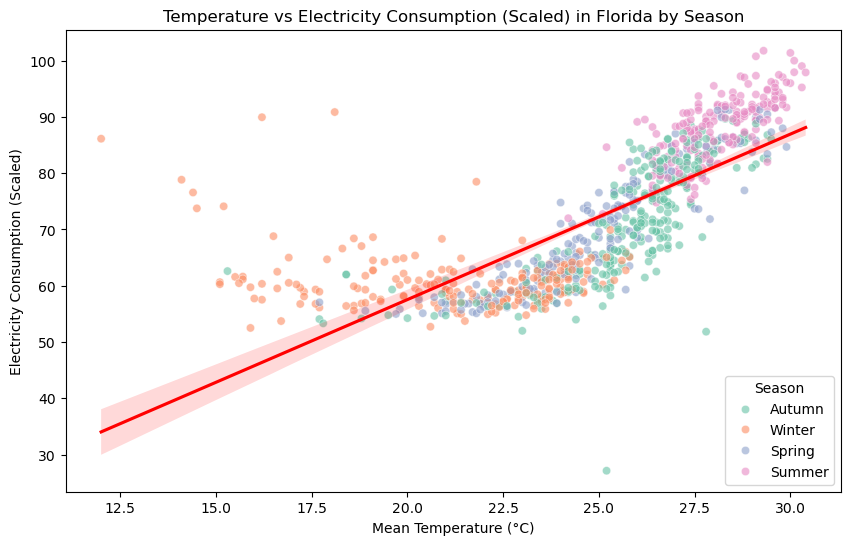

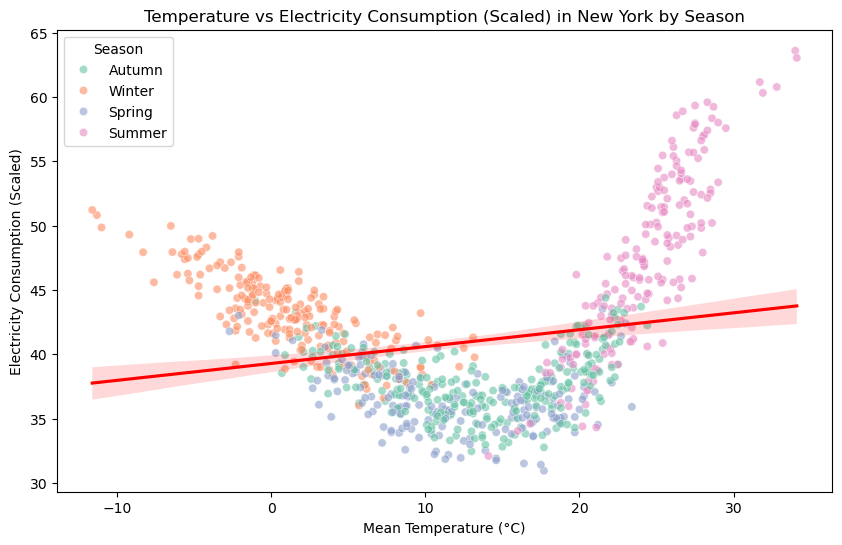

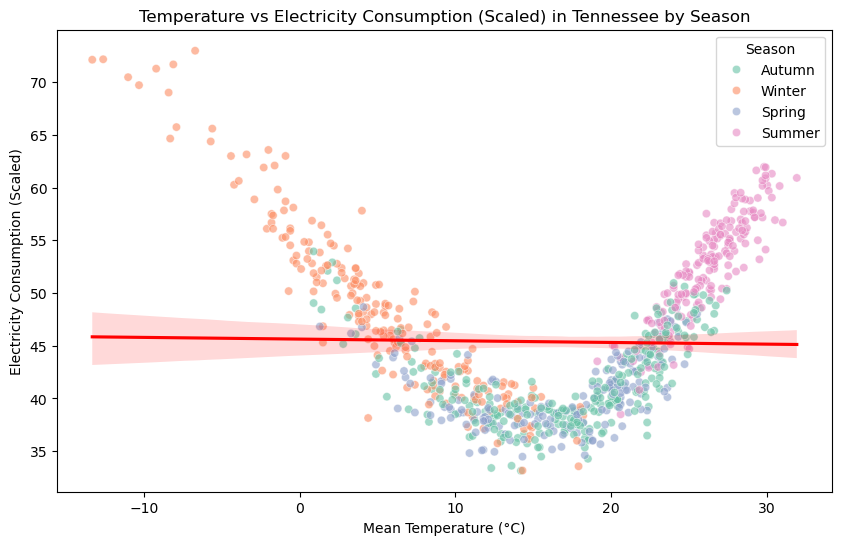

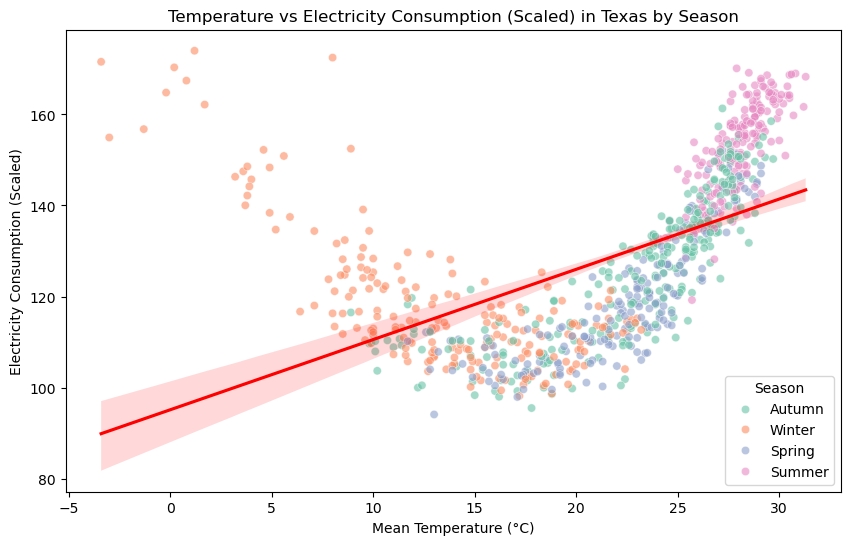

In [94]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(get_season)

states = df['state'].unique()

for state in states:
    subset = df[df['state'] == state]
    plt.figure(figsize=(10,6))
    sns.scatterplot(
        data=subset, x='temp_mean', y='electricity_scaled', hue='season', alpha=0.6, palette='Set2'
    )
    sns.regplot(
        data=subset, x='temp_mean', y='electricity_scaled', scatter=False, color='red'
    )
    plt.title(f'Temperature vs Electricity Consumption (Scaled) in {state} by Season')
    plt.xlabel('Mean Temperature (°C)')
    plt.ylabel('Electricity Consumption (Scaled)')
    plt.legend(title='Season')
    plt.show()


**Explanation:**

- **California:** There is a strong positive relationship between temperature and electricity consumption, especially in summer. As temperatures rise, electricity use increases, likely due to air conditioning.

- **Carolinas:** The relationship is U-shaped. Electricity consumption is high at both low (winter heating) and high (summer cooling) temperatures, and lowest in mild weather.

- **Florida:** Shows a clear positive correlation. Higher temperatures, especially in summer, lead to higher electricity use, mainly for cooling.

- **New York:** Also displays a U-shaped pattern. Consumption is higher in winter (heating) and summer (cooling), and lower in spring/autumn.

- **Tennessee:** Similar to New York and Carolinas, with a U-shaped curve reflecting both heating and cooling needs.

- **Texas:** Strong positive correlation, especially in summer. High temperatures drive up electricity demand for cooling.

These patterns highlight how climate and seasonal changes affect energy consumption differently in each state.

## Insights & Conclusions

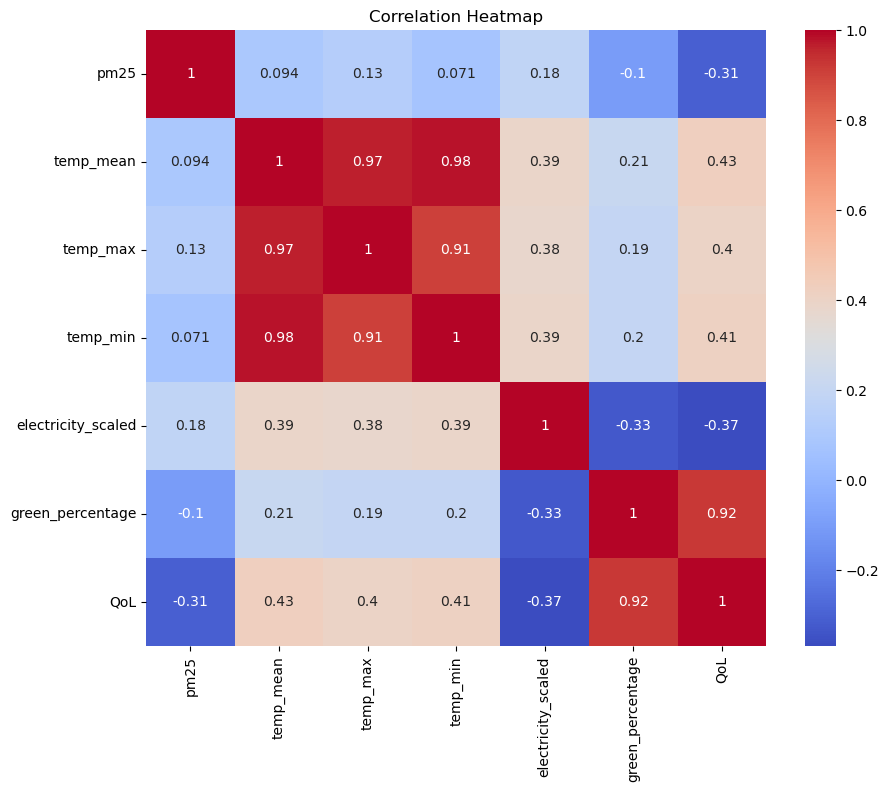

In [95]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['pm25','temp_mean','temp_max','temp_min','electricity_scaled','green_percentage','QoL']].corr(), 
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [96]:
df[['green_percentage','pm25']].corr()

,green_percentage,pm25
green_percentage,1.000000,-0.102408
pm25,-0.102408,1.000000


In [97]:
df[['temp_mean','electricity_scaled']].corr()

,temp_mean,electricity_scaled
temp_mean,1.000000,0.387119
electricity_scaled,0.387119,1.000000


In [98]:
df.groupby(['state','year','month'])[['temp_mean','electricity_scaled']].mean()

temp_mean  electricity_scaled
state      year month                               
California 2023 9      20.088235           73.969612
                10     20.403226           72.148184
                11     16.650000           67.667487
                12     14.780645           69.355261
           2024 1      12.280645           68.515977
...                          ...                 ...
Texas      2025 8      28.525806          159.357826
                9      27.056667          146.615770
                10     24.412903          132.152839
                11     19.283333          120.329033
                12     14.424000          121.788646

[168 rows x 2 columns]

In [99]:
states = df['state'].unique()
corr_table = []

for state in states:
    subset = df[df['state'] == state]
    corr = subset['temp_mean'].corr(subset['electricity_scaled'])
    corr_table.append({'state': state, 'temp_electricity_corr': corr})

corr_df = pd.DataFrame(corr_table)
print(corr_df)


        state  temp_electricity_corr
0  California               0.758724
1   Carolinas               0.064376
2     Florida               0.759025
3    New York               0.211336
4   Tennessee              -0.019621
5       Texas               0.533885


In [100]:
r, p = pearsonr(df['green_percentage'], df['pm25'])
print(f"Pearson correlation between Green Space and PM2.5: r={r}, p-value={p}")

Pearson correlation between Green Space and PM2.5: r=-0.10240801055950113, p-value=3.9741030967903744e-13


The p-value (~4e-13) is extremely small, which means the likelihood that this weak negative correlation occurred by random chance is practically zero. In other words, even though the correlation coefficient is small (r ≈ -0.10), we can be confident that there is a real, consistent association between higher green space coverage and slightly lower PM2.5 levels across the dataset. This shows that green space does have a measurable, albeit modest, impact on air quality.

In [101]:

X = df[['temp_mean']]
y = df['electricity_mwh']

lr = LinearRegression()
lr.fit(X, y)

print("Slope:", lr.coef_[0])
print("R²:", lr.score(X, y))


Slope: 14594.184801999767
R²: 0.14986097968933754


The slope (~14594) indicates that for each 1°C increase in mean temperature, electricity consumption increases by roughly 14,594 MWh on average. The R² value (~0.15) shows that temperature explains about 15% of the variation in electricity usage. This suggests that while temperature does have a noticeable effect on electricity demand, there are other factors (like population, industrial activity, and behavior) that contribute more to overall consumption.

In [102]:
weekdays = df[df['is_weekend']==0]['pm25']
weekends = df[df['is_weekend']==1]['pm25']

t, p = ttest_ind(weekdays, weekends, nan_policy='omit')
print(f"T-test between Weekdays and Weekends PM2.5: t={t}, p-value={p}")

T-test between Weekdays and Weekends PM2.5: t=-1.4434837660627864, p-value=0.14894695329696933


The t-test compares PM2.5 levels between weekdays and weekends. The t-statistic (~-1.44) and p-value (~0.15) indicate that there is no statistically significant difference in air pollution between weekdays and weekends. This suggests that PM2.5 levels are fairly consistent throughout the week, likely because major pollution sources such as traffic, industry, and wildfires operate continuously rather than only on specific days.

In [103]:
for state in df['state'].unique():
    sub = df[df['state']==state]
    wd = sub[sub['is_weekend']==0]['pm25']
    we = sub[sub['is_weekend']==1]['pm25']
    t, p = ttest_ind(wd, we, nan_policy='omit')
    print(state, p)

California 0.10809993294214748
Carolinas 0.24984523965961364
Florida 0.8024812226921315
New York 0.2775450677721877
Tennessee 0.19736380433198525
Texas 0.03359989316541999


The state-wise t-tests compare PM2.5 levels between weekdays and weekends for each state. Most states (California, Carolinas, Florida, New York, Tennessee) show p-values above 0.05, indicating no significant difference in air pollution between weekdays and weekends. Texas is the only state with a p-value (~0.034) below 0.05, suggesting a slight but statistically significant difference there. Overall, this shows that daily PM2.5 levels are generally consistent within each state, with only minor variations in specific cases.